In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.3)
    Q3 = df[column].quantile(0.7)
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered



In [3]:
# TASK 3

diamond=pd.read_csv('diamond.csv')
diamond = diamond.drop('Unnamed: 0', axis=1)


numerical_columns = diamond.select_dtypes(include=['float64', 'int64']).columns
categorical_columns= diamond.select_dtypes(include=['object']).columns

columns_to_clean = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y','z']

for column in columns_to_clean:
    diamond[column] = pd.to_numeric(diamond[column], errors='coerce')


diamond=diamond.dropna()

diamond['cut'] = diamond['cut'].str.capitalize()
diamond['color'] = diamond['color'].str.upper()
diamond['clarity'] = diamond['clarity'].str.upper()

columns_to_check = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y','z']

for column in columns_to_check:
    diamond = remove_outliers(diamond, column)

columns_to_normalize = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y','z']

min_values = diamond[columns_to_normalize].min()
max_values = diamond[columns_to_normalize].max()
for col in columns_to_normalize:
    diamond[col] = (diamond[col] - min_values[col]) / (max_values[col] - min_values[col])

diamond['color']= diamond['color'].astype('category').cat.codes
diamond['cut']= diamond['cut'].astype('category').cat.codes
diamond['clarity']= diamond['clarity'].astype('category').cat.codes
# print(diamond.shape)
# print(diamond.head())

Y = diamond['carat'].values
X=diamond.drop(columns=['carat'])

import random
N = X.shape[0]
indices = list(range(N))
random.seed(42)
random.shuffle(indices)

train_size = int(0.8 * N)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X.iloc[train_indices]
Y_train = Y[train_indices]
X_test = X.iloc[test_indices]
Y_test = Y[test_indices]

print("Shape of X_train: ",X_train.shape,"Shape of X_test: ",X_test.shape)
print("Shape of Y_train: ",Y_train.shape,"Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (30080, 11) Shape of X_test:  (7521, 11)
Shape of Y_train:  (30080,) Shape of Y_test:  (7521,)


OLS Weights:  [-9.82939541e-02  5.66635470e-04  3.93790616e-03 -2.42697456e-03
  6.45751342e-05 -1.96583238e-04  1.63312096e-02  1.77797811e-02
  1.64873479e-01  5.12223961e-01 -7.23164460e-03  2.62043150e-01]
Mean Squared Error (OLS):  0.0006460543380791211
Weights of linear regresssion is saved as Pavithran_Assignment1_Part3.pickle


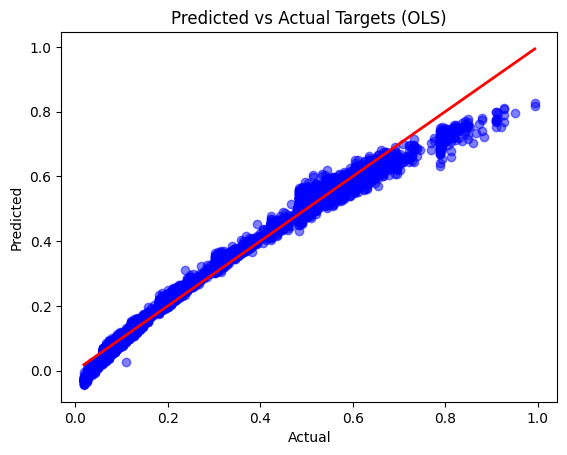

In [9]:
import numpy as np

X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)

# Adding bias term to X_train
X_train_np = np.c_[np.ones(X_train_np.shape[0]), X_train_np]  # Adding a column of ones for the bias term

# OLS formula
w_ols = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ Y_train_np
print("OLS Weights: ", w_ols)

# Adding bias term to X_test
X_test_np = np.array(X_test)
X_test_np = np.c_[np.ones(X_test_np.shape[0]), X_test_np]

Y_pred = X_test_np @ w_ols

mse = np.mean((Y_test - Y_pred) ** 2)
print("Mean Squared Error (OLS): ", mse)

with open("Pavithran_Assignment1_Part3_linear.pickle", "wb") as file:
    pickle.dump(w_ols, file)
print("Weights of linear regresssion is saved as Pavithran_Assignment1_Part3_linear.pickle")

plt.scatter(Y_test, Y_pred, color="blue", alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Targets (OLS)")
plt.show()


Ridge Weights:  [ 0.00324298  0.00254837  0.00906705 -0.00810006  0.00110604  0.00078111
  0.01274544  0.02273176  0.19310482  0.1768427   0.17720777  0.15516446]
Mean Squared Error (Ridge):  0.0025135305080652556


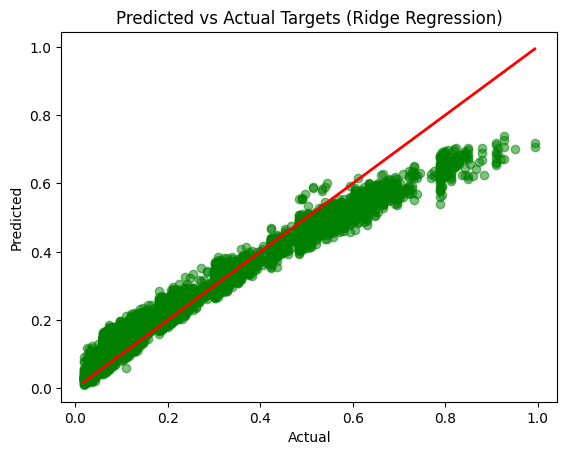

In [6]:
lambda_reg = 1500

I = np.eye(X_train_np.shape[1])
w_ridge = np.linalg.inv(X_train_np.T @ X_train_np + lambda_reg * I) @ X_train_np.T @ Y_train_np
print("Ridge Weights: ", w_ridge)

Y_pred_ridge = X_test_np @ w_ridge

mse_ridge = np.mean((Y_test - Y_pred_ridge) ** 2)
print("Mean Squared Error (Ridge): ", mse_ridge)

with open("Pavithran_Assignment1_Part3_ridge.pickle", "wb") as file:
    pickle.dump(w_ols, file)
print("Weights of linear regresssion is saved as Pavithran_Assignment1_Part3_ridge.pickle")

# Plotting
plt.scatter(Y_test, Y_pred_ridge, color="green", alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Targets (Ridge Regression)")
plt.show()